## «Анализ данных об оптовых продажах аудиотехники»

Проведем анализ данных компании «Карпов Саунд», которая занимается оптовой продажей аудиотехники и предлагает широкий ассортимент товаров от ведущих мировых брендов, включающий профессиональные аудиосистемы, домашние кинотеатры, портативные аудиоустройства и прочие аксессуары.

Данные собраны в формате резервной выгрузке (разрозненные папки с данными). Выполним :  
- сборка датасета, 
- анализ динамики заказов, 
- подсчет revenue, AOV, 
- top brands, top managers

In [2]:
import pandas as pd
import os

In [3]:
orders = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/'
for path, dirs, files in os.walk(orders):
    print(path, dirs, files)

/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/ ['2024-03-10', '2024-03-01', '2024-03-27', '2024-03-18', '2024-03-28', '2024-03-23', '2024-03-05', '2024-03-17', '2024-03-08', '2024-03-06', '2024-03-16', '2024-03-22', '2024-03-14', '2024-03-20', '2024-03-25', '2024-03-12', '2024-03-09', '2024-03-19', '2024-03-03', '2024-03-21', '2024-03-29', '2024-03-13', '2024-03-04', '2024-03-07', '2024-03-15', '2024-03-11', '2024-03-02', '2024-03-31', '2024-03-30', '2024-03-24', '2024-03-26'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10 ['Владимир Ударников', 'Екатерина Тарелкина', 'Сергей Контрабасов'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10/Владимир Ударников [] ['orders.csv', 'order_status.csv']
/mn

/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-21/Алексей Саксофонов [] ['orders.csv', 'order_status.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-21/Аркадий Октавин [] ['orders.csv', 'order_status.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-21/Виктор Тромбонов [] ['orders.csv', 'order_status.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-21/Максим Барабанов [] ['orders.csv', 'order_status.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-21/Маргарита Камертонова [] ['orders.csv', 'ord

In [4]:
file_paths_orders = []
# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(orders):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        # Проверка формата файла — файл должен заканчиваться на '.csv'
        if file.endswith('orders.csv'):
            # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_orders.append(file_path)

In [5]:
file_paths_orders

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10/Владимир Ударников/orders.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10/Екатерина Тарелкина/orders.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10/Сергей Контрабасов/orders.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-01/Владимир Ударников/orders.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-01/Екатерина Тарелкина/orders.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/pyth

In [6]:
df_orders = pd.DataFrame()

for file_path in file_paths_orders:
    data = pd.read_csv(file_path)
    name = file_path.split('/')[-2]
        # Извлекаем дату
    # Разделяем путь по символу '/' и берем третий элемент с конца
    date = file_path.split('/')[-3]
        
        # Добавляем новые столбцы
    data['manager'] = name
    data['date'] = date
    df_orders = pd.concat([df_orders, data], ignore_index=True)

In [7]:
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [8]:
file_paths_orders_status = []
# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(orders):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        # Проверка формата файла — файл должен заканчиваться на '.csv'
        if file.endswith('status.csv'):
            # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_orders_status.append(file_path)

In [9]:
file_paths_orders_status

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10/Владимир Ударников/order_status.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10/Екатерина Тарелкина/order_status.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-10/Сергей Контрабасов/order_status.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-01/Владимир Ударников/order_status.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/orders/2024-03-01/Екатерина Тарелкина/order_status.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb8

In [10]:
df_order_status = pd.DataFrame()

for file_path in file_paths_orders_status:
        data = pd.read_csv(file_path)
        df_order_status = pd.concat([df_order_status, data], ignore_index=True)

In [11]:
df_order_status

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled
...,...,...,...
341,SOCT-63427141,30,confirmed
342,HLDH-41146746,22,confirmed
343,IZFC-94335845,56,confirmed
344,CUDB-19668701,82,confirmed


In [12]:
products = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/products/'
for path, dirs, files in os.walk(products):
    print(path, dirs, files)

/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/products/ ['AV-ресивер', 'Настенная акустика', 'Система караоке', 'Напольная акустика', 'Полочная акустика', 'Сабвуфер', 'Саундбар', 'Активные колонки', 'Беспроводная акустика', 'Конденсаторный микрофон', 'Центральный канал', 'Динамический микрофон', 'AV-процессор', 'Предусилитель', 'Интегральный усилитель', 'Виниловый проигрыватель', 'Комплекты акустики', 'Наушники с микрофоном', 'Умная колонка', 'Домашний кинотеатр', 'Ламповый усилитель', 'Музыкальный центр', 'Портативная акустика', 'Проводные наушники', 'Усилитель мощности', 'Беспроводные наушники'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/products/AV-ресивер [] ['products.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/shared/homeworks/python_ds_miniprojects/final_project/data/products/На

In [13]:
file_paths_products = []
# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(products):
    # Вложенный цикл для перебора файлов в текущей папке
    for file in files:
        # Проверка формата файла — файл должен заканчиваться на '.csv'
        if file.endswith('products.csv'):
            # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths_products.append(file_path)
            
df_products = pd.DataFrame()

for file_path in file_paths_products:
    data = pd.read_csv(file_path)
    name = file_path.split('/')[-2]
        # Извлекаем дату
    # Разделяем путь по символу '/' и берем третий элемент с конца        
        # Добавляем новые столбцы
    data['category'] = name
    df_products = pd.concat([df_products, data], ignore_index=True)

In [14]:
df_products

,id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [15]:
df_orders.to_csv('df_orders.csv', index=False)
df_order_status.to_csv('df_order_status.csv', index=False)
df_products.to_csv('df_products.csv', index=False)

In [16]:
a = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-elena-doros-ttb853-d3ed6/Финальный проект модуля Python «Анализ данных об оптовых продажах аудиотехники»/df_orders.csv')

In [17]:
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [18]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d')

In [19]:
max_sales = df_orders.groupby('date', as_index = False).order_id.nunique().rename(columns = {'order_id':'orders'}).sort_values('orders', ascending = False)

In [20]:
max_sales

,date,orders
13,2024-03-14,34
12,2024-03-13,24
0,2024-03-01,22
28,2024-03-29,19
4,2024-03-05,18
26,2024-03-27,18
25,2024-03-26,17
14,2024-03-15,17
21,2024-03-22,16
18,2024-03-19,15


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# max_sales['day_of_week'] = df['date'].dt.day_name()  # Получаем название дня недели
max_sales['day_of_week_num'] = max_sales['date'].dt.dayofweek  # Получаем номер дня недели (0 - понедельник, 6 - воскресенье)

In [23]:
max_sales_day = max_sales.groupby('day_of_week_num', as_index = False).agg({'orders':'sum'}).sort_values('day_of_week_num')

In [24]:
max_sales_day

,day_of_week_num,orders
0,0,43
1,1,65
2,2,70
3,3,73
4,4,75
5,5,10
6,6,10


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text major ticklabel objects>)

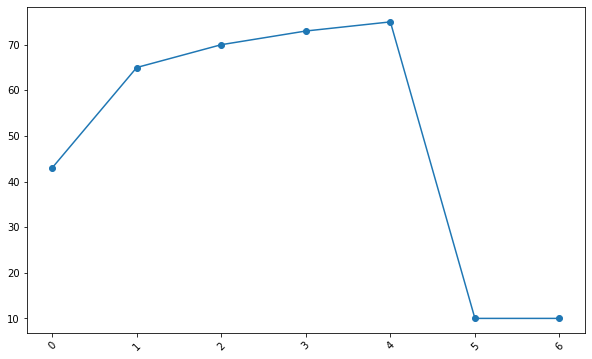

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(max_sales_day['day_of_week_num'], max_sales_day['orders'], marker='o')
plt.xticks(rotation=45)

In [26]:
import numpy as np

# Определяем, является ли день выходным
max_sales['is_weekend'] = max_sales['date'].dt.dayofweek >= 5  # 5 и 6 - это суббота и воскресенье

# Определяем, является ли день рабочим
# max_sales['is_weekday'] = ~max_sales['is_weekend']  # Будний день - это не выходной
# Список праздничных дней
holidays = pd.to_datetime(['2024-03-08'])  # Пример праздников

# Определяем, является ли день праздничным
max_sales['is_holiday'] = max_sales['date'].isin(holidays)

In [27]:
max_sales

,date,orders,day_of_week_num,is_weekend,is_holiday
13,2024-03-14,34,3,False,False
12,2024-03-13,24,2,False,False
0,2024-03-01,22,4,False,False
28,2024-03-29,19,4,False,False
4,2024-03-05,18,1,False,False
26,2024-03-27,18,2,False,False
25,2024-03-26,17,1,False,False
14,2024-03-15,17,4,False,False
21,2024-03-22,16,4,False,False
18,2024-03-19,15,1,False,False


In [28]:
Sunday = max_sales.loc[max_sales.day_of_week_num == 6]
Sunday

,date,orders,day_of_week_num,is_weekend,is_holiday
16,2024-03-17,3,6,True,False
9,2024-03-10,3,6,True,False
23,2024-03-24,2,6,True,False
2,2024-03-03,1,6,True,False
30,2024-03-31,1,6,True,False


In [29]:
Monday = max_sales.loc[max_sales.day_of_week_num == 0]
Monday

,date,orders,day_of_week_num,is_weekend,is_holiday
10,2024-03-11,12,0,False,False
17,2024-03-18,12,0,False,False
3,2024-03-04,10,0,False,False
24,2024-03-25,9,0,False,False


In [30]:
Friday = max_sales.loc[max_sales.day_of_week_num == 4]
Friday

,date,orders,day_of_week_num,is_weekend,is_holiday
0,2024-03-01,22,4,False,False
28,2024-03-29,19,4,False,False
14,2024-03-15,17,4,False,False
21,2024-03-22,16,4,False,False
7,2024-03-08,1,4,False,True


In [31]:
df_orders

,order_id,product_id,quantity,manager,date
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10
...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26


In [32]:
df_orders.order_id.nunique()

346

In [33]:
df_order_status

,order_id,client_id,status
0,QPLK-54839036,52,confirmed
1,MAQJ-95867467,84,canceled
2,KHLF-51759445,23,confirmed
3,DALF-47566548,97,confirmed
4,BZHU-92977894,29,canceled
...,...,...,...
341,SOCT-63427141,30,confirmed
342,HLDH-41146746,22,confirmed
343,IZFC-94335845,56,confirmed
344,CUDB-19668701,82,confirmed


In [34]:
orders_status = df_orders.merge(df_order_status, on=['order_id'])
orders_status.product_id = orders_status.product_id.astype('int64')

In [35]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
1,QPLK-54839036,594,6,Владимир Ударников,2024-03-10,52,confirmed
2,QPLK-54839036,670,16,Владимир Ударников,2024-03-10,52,confirmed
3,QPLK-54839036,469,9,Владимир Ударников,2024-03-10,52,confirmed
4,QPLK-54839036,1302,5,Владимир Ударников,2024-03-10,52,confirmed
...,...,...,...,...,...,...,...
4598,UAKD-95751033,812,24,Ксения Балалайкина,2024-03-26,61,confirmed
4599,UAKD-95751033,145,9,Ксения Балалайкина,2024-03-26,61,confirmed
4600,UAKD-95751033,194,6,Ксения Балалайкина,2024-03-26,61,confirmed
4601,UAKD-95751033,1086,3,Ксения Балалайкина,2024-03-26,61,confirmed


In [36]:
orders_status.to_csv('orders_status.csv', index=False)

In [37]:
orders_status_confirmed = orders_status.loc[orders_status.status =='confirmed']

In [38]:
orders_status_confirmed = orders_status_confirmed.drop_duplicates(subset = {'order_id'})

In [39]:
orders_status_confirmed

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
20,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed
35,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed
75,MULT-10194362,922,16,Владимир Ударников,2024-03-01,59,confirmed
99,UFYZ-93434889,1585,3,Владимир Ударников,2024-03-01,28,confirmed
...,...,...,...,...,...,...,...
4539,SOCT-63427141,548,8,Максим Барабанов,2024-03-26,30,confirmed
4558,HLDH-41146746,1479,20,Максим Барабанов,2024-03-26,22,confirmed
4571,IZFC-94335845,1343,8,Максим Барабанов,2024-03-26,56,confirmed
4580,CUDB-19668701,1007,16,Маргарита Камертонова,2024-03-26,82,confirmed


In [40]:
orders_status_canceled = orders_status.loc[orders_status.status =='canceled']
orders_status_canceled = orders_status_canceled.drop_duplicates(subset = {'order_id'})
orders_status_canceled

,order_id,product_id,quantity,manager,date,client_id,status
8,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled
55,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled
90,CGLU-02678560,1191,10,Владимир Ударников,2024-03-01,95,canceled
1323,LOIF-61240616,559,26,Максим Барабанов,2024-03-06,60,canceled
2083,MBWZ-51902571,67,3,Антон Скрипкин,2024-03-20,57,canceled
2110,HJUU-27621138,919,32,Надежда Гармошкина,2024-03-20,40,canceled
2282,AUKL-69544842,1423,10,Виктор Тромбонов,2024-03-25,78,canceled
2407,UHJG-73205112,283,44,Владимир Ударников,2024-03-12,77,canceled
2550,CXES-07518609,1637,22,Маргарита Камертонова,2024-03-12,49,canceled
2595,BKWO-98301947,1286,8,Надежда Гармошкина,2024-03-09,63,canceled


In [41]:
orders_status_canceled.order_id.count()

37

In [42]:
orders_status_confirmed.order_id.count()

309

In [43]:
rate_canceled = (orders_status_canceled.order_id.count()/(orders_status_canceled.order_id.count()+orders_status_confirmed.order_id.count())).round(2)

In [44]:
rate_canceled

0.11

In [45]:
orders_status =  orders_status.drop_duplicates(subset = {'order_id'})
orders_status_gr = orders_status.groupby(['date','status'], as_index = False).agg({'order_id':'count'}).rename(columns = {'order_id':'orders'})

In [46]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
8,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled
20,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed
35,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed
55,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled
...,...,...,...,...,...,...,...
4539,SOCT-63427141,548,8,Максим Барабанов,2024-03-26,30,confirmed
4558,HLDH-41146746,1479,20,Максим Барабанов,2024-03-26,22,confirmed
4571,IZFC-94335845,1343,8,Максим Барабанов,2024-03-26,56,confirmed
4580,CUDB-19668701,1007,16,Маргарита Камертонова,2024-03-26,82,confirmed


In [47]:
orders_status_gr

,date,status,orders
0,2024-03-01,canceled,2
1,2024-03-01,confirmed,20
2,2024-03-02,confirmed,2
3,2024-03-03,confirmed,1
4,2024-03-04,confirmed,10
5,2024-03-05,confirmed,18
6,2024-03-06,canceled,1
7,2024-03-06,confirmed,13
8,2024-03-07,canceled,1
9,2024-03-07,confirmed,13


In [48]:
orders_status_pivot = orders_status_gr.pivot_table(index='date', columns='status', values='orders', aggfunc='sum', fill_value=0)

In [49]:
orders_status_pivot.loc[orders_status_pivot.confirmed ==0]


status,canceled,confirmed
date,,
2024-03-09,1,0


In [50]:
orders_status_pivot.sort_values('confirmed', ascending = False)

status,canceled,confirmed
date,,
2024-03-14,0,34
2024-03-01,2,20
2024-03-29,0,19
2024-03-27,0,18
2024-03-05,0,18
2024-03-22,0,16
2024-03-26,1,16
2024-03-15,1,16
2024-03-19,2,13


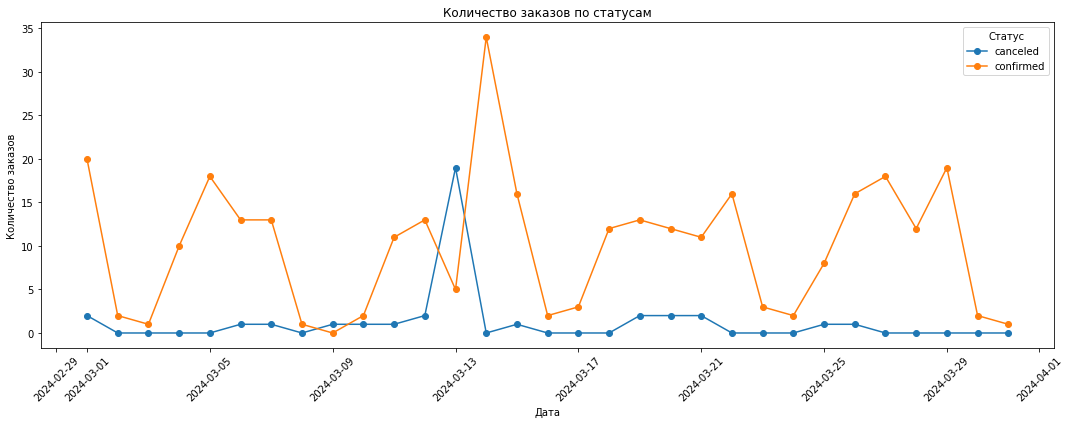

In [51]:
plt.figure(figsize=(15, 6))

for status in orders_status_pivot.columns:
    plt.plot(orders_status_pivot.index, orders_status_pivot[status], marker='o', label=status)
    
plt.title('Количество заказов по статусам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)  # Поворот меток на оси X
plt.legend(title='Статус')  # Легенда для статусов
plt.tight_layout()  # Автоматическая подстройка параметров графика
plt.show()

In [52]:
days = orders_status.loc[(orders_status.date == '2024-03-14') | (orders_status.date == '2024-03-13')]
days

,order_id,product_id,quantity,manager,date,client_id,status
1604,IMND-92004620,1634,20,Владимир Ударников,2024-03-14,38,confirmed
1614,WNMY-98871151,1249,20,Екатерина Тарелкина,2024-03-14,56,confirmed
1627,AUZX-12706022,403,19,Екатерина Тарелкина,2024-03-14,83,confirmed
1646,MVCT-47197855,1309,5,Екатерина Тарелкина,2024-03-14,68,confirmed
1664,MOIW-03448563,1629,16,Надежда Гармошкина,2024-03-14,11,confirmed
1679,IMDE-82000970,555,28,Надежда Гармошкина,2024-03-14,53,confirmed
1687,EZAA-08394172,643,20,Анастасия Дудкина,2024-03-14,39,confirmed
1696,JXFD-76664939,1337,12,Анастасия Дудкина,2024-03-14,94,confirmed
1708,DMEB-71700015,445,4,Сергей Контрабасов,2024-03-14,93,confirmed
1720,FDEB-71487438,511,13,Алексей Саксофонов,2024-03-14,43,confirmed


In [53]:
day_min = days.loc[(orders_status.date == '2024-03-13') & (orders_status.status =='canceled')]
day_min = day_min[['product_id','client_id','quantity','manager' ]]
day_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 3186 to 3521
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  19 non-null     int64 
 1   client_id   19 non-null     int64 
 2   quantity    19 non-null     int64 
 3   manager     19 non-null     object
dtypes: int64(3), object(1)
memory usage: 760.0+ bytes


In [54]:
day_max = days.loc[(orders_status.date == '2024-03-14') & (orders_status.status =='confirmed')]
day_max = day_max[['product_id','client_id','quantity','manager' ]]
day_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1604 to 2024
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  34 non-null     int64 
 1   client_id   34 non-null     int64 
 2   quantity    34 non-null     int64 
 3   manager     34 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [55]:
day_min_max = pd.merge(day_min, day_max, on =['product_id', 'client_id','quantity','manager'])

day_min_max

,product_id,client_id,quantity,manager
0,1634,38,20,Владимир Ударников
1,1249,56,20,Екатерина Тарелкина
2,403,83,19,Екатерина Тарелкина
3,511,43,13,Алексей Саксофонов
4,1405,66,44,Алексей Саксофонов
5,1319,51,32,Алексей Саксофонов
6,291,60,12,Виктор Тромбонов
7,1459,95,20,Виктор Тромбонов
8,593,94,9,Виктор Тромбонов
9,62,93,4,Виктор Тромбонов


In [56]:
with open('usd_rate.txt', 'r', encoding='utf-8') as file:
    currency = file.readlines()
usd_rate = pd.DataFrame(currency, columns=['raw_data'])

In [57]:
currency

['2024-03-01,90.8423,Доллар США\n',
 '2024-03-02,91.3336,Доллар США\n',
 '2024-03-03,91.3336,Доллар США\n',
 '2024-03-04,91.3336,Доллар США\n',
 '2024-03-05,91.3534,Доллар США\n',
 '2024-03-06,91.1604,Доллар США\n',
 '2024-03-07,90.3412,Доллар США\n',
 '2024-03-08,90.7493,Доллар США\n',
 '2024-03-09,90.7493,Доллар США\n',
 '2024-03-10,90.7493,Доллар США\n',
 '2024-03-11,90.7493,Доллар США\n',
 '2024-03-12,90.6252,Доллар США\n',
 '2024-03-13,90.8818,Доллар США\n',
 '2024-03-14,91.5449,Доллар США\n',
 '2024-03-15,91.6359,Доллар США\n',
 '2024-03-16,91.87,Доллар США\n',
 '2024-03-17,91.87,Доллар США\n',
 '2024-03-18,91.87,Доллар США\n',
 '2024-03-19,91.9829,Доллар США\n',
 '2024-03-20,92.2243,Доллар США\n',
 '2024-03-21,92.6861,Доллар США\n',
 '2024-03-22,91.9499,Доллар США\n',
 '2024-03-23,92.6118,Доллар США\n',
 '2024-03-24,92.6118,Доллар США\n',
 '2024-03-25,92.6118,Доллар США\n',
 '2024-03-26,92.7761,Доллар США\n',
 '2024-03-27,92.5745,Доллар США\n',
 '2024-03-28,92.5919,Доллар США\n'

In [58]:
with open('usd_rate.txt', 'r', encoding='utf-8') as file:
    currency = file.readlines()
usd_rate = pd.DataFrame(currency, columns=['raw_data'])

# Разделим строки по пробелу и создадим отдельные колонки
usd_rate['raw_data'] = usd_rate['raw_data'].str.strip()  # убираем лишние пробелы и \n
usd_rate[['date', 'currency_rate', 'description']] = usd_rate['raw_data'].str.split(',', expand=True)

# 4. Преобразуем типы дату:
usd_rate['date'] = pd.to_datetime(usd_rate['date'], format='%Y-%m-%d')
usd_rate['currency_rate'] = pd.to_numeric(usd_rate['currency_rate'], errors='coerce')
# 5. Удаляем колонку 'raw_data', она больше не нужна
usd_rate = usd_rate.drop(columns=['raw_data'])



In [59]:
usd_rate = usd_rate[['date','currency_rate']]
usd_rate

,date,currency_rate
0,2024-03-01,90.8423
1,2024-03-02,91.3336
2,2024-03-03,91.3336
3,2024-03-04,91.3336
4,2024-03-05,91.3534
5,2024-03-06,91.1604
6,2024-03-07,90.3412
7,2024-03-08,90.7493
8,2024-03-09,90.7493
9,2024-03-10,90.7493


In [60]:
usd_rate.currency_rate.mean().round(2)

91.7

In [61]:
orders_status

,order_id,product_id,quantity,manager,date,client_id,status
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed
8,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled
20,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed
35,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed
55,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled
...,...,...,...,...,...,...,...
4539,SOCT-63427141,548,8,Максим Барабанов,2024-03-26,30,confirmed
4558,HLDH-41146746,1479,20,Максим Барабанов,2024-03-26,22,confirmed
4571,IZFC-94335845,1343,8,Максим Барабанов,2024-03-26,56,confirmed
4580,CUDB-19668701,1007,16,Маргарита Камертонова,2024-03-26,82,confirmed


In [62]:
df_products = df_products.rename(columns = {'id':'product_id'})
df_products

,product_id,name,price,category
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер
...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники


In [63]:
df_full = pd.merge(orders_status,df_products, on =['product_id'])


In [64]:
df_full

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика
1,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled,"Edifier, MP380",83.91,Портативная акустика
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном
4,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled,"JBL, Stage A120P",324.19,Сабвуфер
...,...,...,...,...,...,...,...,...,...,...
341,SOCT-63427141,548,8,Максим Барабанов,2024-03-26,30,confirmed,"JBL, EON615",415.04,Активные колонки
342,HLDH-41146746,1479,20,Максим Барабанов,2024-03-26,22,confirmed,"Tannoy, Eclipse Mini",141.33,Полочная акустика
343,IZFC-94335845,1343,8,Максим Барабанов,2024-03-26,56,confirmed,"Sennheiser, E 904",171.19,Динамический микрофон
344,CUDB-19668701,1007,16,Маргарита Камертонова,2024-03-26,82,confirmed,"Monitor Audio, Bronze W10",387.93,Сабвуфер


In [65]:
total = pd.merge(df_full,usd_rate, on =['date'])


In [66]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493
1,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled,"Edifier, MP380",83.91,Портативная акустика,90.7493
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники,90.7493
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном,90.8423
4,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled,"JBL, Stage A120P",324.19,Сабвуфер,90.8423
...,...,...,...,...,...,...,...,...,...,...,...
341,OYBY-86181208,211,2,Анастасия Дудкина,2024-03-31,11,confirmed,"Denon, AVC-X4700H",1496.81,AV-ресивер,92.3660
342,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed,"Heco, Concerto 3000",1720.72,Музыкальный центр,92.3660
343,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed,"Heco, Music Style 200",205.35,Полочная акустика,92.3660
344,QAOD-42518444,90,8,Екатерина Тарелкина,2024-03-24,97,confirmed,"Bose, Virtually Invisible 591",298.17,Настенная акустика,92.6118


In [67]:
total['price_rub'] = total['price']*total['currency_rate']
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482
1,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled,"Edifier, MP380",83.91,Портативная акустика,90.7493,7614.773763
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники,90.7493,22613.818067
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном,90.8423,2320.112342
4,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled,"JBL, Stage A120P",324.19,Сабвуфер,90.8423,29450.165237
...,...,...,...,...,...,...,...,...,...,...,...,...
341,OYBY-86181208,211,2,Анастасия Дудкина,2024-03-31,11,confirmed,"Denon, AVC-X4700H",1496.81,AV-ресивер,92.3660,138254.352460
342,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed,"Heco, Concerto 3000",1720.72,Музыкальный центр,92.3660,158936.023520
343,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed,"Heco, Music Style 200",205.35,Полочная акустика,92.3660,18967.358100
344,QAOD-42518444,90,8,Екатерина Тарелкина,2024-03-24,97,confirmed,"Bose, Virtually Invisible 591",298.17,Настенная акустика,92.6118,27614.060406


In [68]:
total['revenue'] = total['price_rub']*total['quantity']
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,290228.966302
1,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled,"Edifier, MP380",83.91,Портативная акустика,90.7493,7614.773763,121836.380208
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники,90.7493,22613.818067,949780.358814
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном,90.8423,2320.112342,20881.011078
4,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled,"JBL, Stage A120P",324.19,Сабвуфер,90.8423,29450.165237,412302.313318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,OYBY-86181208,211,2,Анастасия Дудкина,2024-03-31,11,confirmed,"Denon, AVC-X4700H",1496.81,AV-ресивер,92.3660,138254.352460,276508.704920
342,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed,"Heco, Concerto 3000",1720.72,Музыкальный центр,92.3660,158936.023520,794680.117600
343,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed,"Heco, Music Style 200",205.35,Полочная акустика,92.3660,18967.358100,227608.297200
344,QAOD-42518444,90,8,Екатерина Тарелкина,2024-03-24,97,confirmed,"Bose, Virtually Invisible 591",298.17,Настенная акустика,92.6118,27614.060406,220912.483248


In [69]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,290228.966302
1,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled,"Edifier, MP380",83.91,Портативная акустика,90.7493,7614.773763,121836.380208
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники,90.7493,22613.818067,949780.358814
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном,90.8423,2320.112342,20881.011078
4,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled,"JBL, Stage A120P",324.19,Сабвуфер,90.8423,29450.165237,412302.313318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,OYBY-86181208,211,2,Анастасия Дудкина,2024-03-31,11,confirmed,"Denon, AVC-X4700H",1496.81,AV-ресивер,92.3660,138254.352460,276508.704920
342,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed,"Heco, Concerto 3000",1720.72,Музыкальный центр,92.3660,158936.023520,794680.117600
343,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed,"Heco, Music Style 200",205.35,Полочная акустика,92.3660,18967.358100,227608.297200
344,QAOD-42518444,90,8,Екатерина Тарелкина,2024-03-24,97,confirmed,"Bose, Virtually Invisible 591",298.17,Настенная акустика,92.6118,27614.060406,220912.483248


In [70]:
df_confirmed = total.loc[total.status == 'confirmed']
df_confirmed

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,290228.966302
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники,90.7493,22613.818067,949780.358814
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном,90.8423,2320.112342,20881.011078
5,GAFV-15191915,630,13,Ксения Балалайкина,2024-03-01,57,confirmed,"JBL, Stage A120P",324.19,Сабвуфер,90.8423,29450.165237,382852.148081
6,MULT-10194362,922,16,Владимир Ударников,2024-03-01,59,confirmed,"Magnat, WSB 50 Pro",210.73,Саундбар,90.8423,19143.197879,306291.166064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,OYBY-86181208,211,2,Анастасия Дудкина,2024-03-31,11,confirmed,"Denon, AVC-X4700H",1496.81,AV-ресивер,92.3660,138254.352460,276508.704920
342,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed,"Heco, Concerto 3000",1720.72,Музыкальный центр,92.3660,158936.023520,794680.117600
343,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed,"Heco, Music Style 200",205.35,Полочная акустика,92.3660,18967.358100,227608.297200
344,QAOD-42518444,90,8,Екатерина Тарелкина,2024-03-24,97,confirmed,"Bose, Virtually Invisible 591",298.17,Настенная акустика,92.6118,27614.060406,220912.483248


In [71]:
df_confirmed['revenue'].sum().round(2)

135370906.44

In [72]:
products_in_orders = df_confirmed['product_id'].unique()


In [73]:
df_products['is_in_orders'] = df_products['product_id'].isin(products_in_orders).map({True: 'yes', False: 'no'})
df_products

,product_id,name,price,category,is_in_orders
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,no
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,no
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,no
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,no
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes
...,...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники,yes
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники,yes
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники,yes
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники,no


In [74]:
df_products.loc[df_products.is_in_orders=='yes'].is_in_orders.count()

267

In [75]:
df_products.loc[df_products.is_in_orders=='no'].is_in_orders.count()

1410

In [76]:
df_products[['brand', 'name_3']] = df_products['name'].str.split(',', expand=True)
df_products

,product_id,name,price,category,is_in_orders,brand,name_3
0,207,"Denon, AVR-S540BT",243.52,AV-ресивер,no,Denon,AVR-S540BT
1,208,"Denon, AVR-X3700H",1305.52,AV-ресивер,no,Denon,AVR-X3700H
2,209,"Denon, AVR-X4700H",1620.21,AV-ресивер,no,Denon,AVR-X4700H
3,210,"Denon, AVR-X6700H",2050.31,AV-ресивер,no,Denon,AVR-X6700H
4,211,"Denon, AVC-X4700H",1496.81,AV-ресивер,yes,Denon,AVC-X4700H
...,...,...,...,...,...,...,...
1672,1592,"Yamaha, YH-L700A",425.72,Беспроводные наушники,yes,Yamaha,YH-L700A
1673,1593,"Yamaha, HPH-MT8",267.38,Беспроводные наушники,yes,Yamaha,HPH-MT8
1674,1594,"Yamaha, TW-E5A",170.30,Беспроводные наушники,yes,Yamaha,TW-E5A
1675,1595,"Yamaha, YH-E500A",222.75,Беспроводные наушники,no,Yamaha,YH-E500A


In [102]:
# Группируем данные по бренду и колонке,где указано,есть товар в заказах, считаем число уникальных товаров. 
# Колонку с числом товаров переименуем в products.
# Определим у каких брендов доля ни разу не заказанных товаров была больше половины от всех продаваемых товаров этого бренда. 
# Но не берем в расчет бренды, которые представлены маленьким числом товаров (меньше 15), они не захламляют виртуальную «полку».

df_products_1 = df_products.groupby(['brand','is_in_orders'], as_index=False).\
                            agg({'product_id':'nunique'}).\
                            rename(columns = {'product_id':'products'})
df_products_1_pivot =df_products_1.pivot_table(index='brand', columns='is_in_orders', \
                                               values='products', aggfunc='sum', fill_value=0)
df_products_1_pivot= df_products_1_pivot.reset_index()
df_products_1_pivot['total_prod']= df_products_1_pivot['no']+df_products_1_pivot['yes']
df_products_1_pivot['rate'] = df_products_1_pivot['no']/df_products_1_pivot['total_prod']
df_products_1_pivot.loc[(df_products_1_pivot.rate>0.5) & (df_products_1_pivot.total_prod >15)]

is_in_orders,brand,no,yes,total_prod,rate
17,Bose,17,4,21,0.809524
32,Dali,67,0,67,1.000000
36,Denon,36,5,41,0.878049
39,Edifier,62,11,73,0.849315
53,Harman Kardon,67,13,80,0.837500
54,Heco,59,32,91,0.648352
57,JBL,82,33,115,0.713043
60,KEF,76,6,82,0.926829
64,Klipsch,57,15,72,0.791667
76,Magnat,76,16,92,0.826087


In [78]:
order_id_unique = df_confirmed.agg({'order_id':'unique'}).count()
order_id_unique

order_id    309
dtype: int64

In [91]:
# Average Order Value - средний чек
AOV = (df_confirmed['revenue'].sum()/order_id_unique).round(2)
AOV

order_id    438093.55
dtype: float64

In [92]:
# Сгруппируем df_confirmed с подтвержденными заказами по дате, считаем на каждую дату число ункальных заказов и выручку.
df_report_by_date = df_confirmed.groupby('date',as_index = False).\
                                 agg({'order_id': 'nunique', 'revenue':'sum'}).\
                                 rename(columns = {'order_id':'orders'})
    
df_report_by_date['average_bill'] = (df_report_by_date['revenue']/df_report_by_date['orders']).round(2)

In [93]:
df_report_by_date

,date,orders,revenue,average_bill
0,2024-03-01,20,6.767299e+06,338364.95
1,2024-03-02,2,4.046279e+05,202313.97
2,2024-03-03,1,7.945110e+04,79451.10
3,2024-03-04,10,3.168961e+06,316896.08
4,2024-03-05,18,5.400390e+06,300021.67
5,2024-03-06,13,1.025666e+07,788973.98
6,2024-03-07,13,6.049141e+06,465318.54
7,2024-03-08,1,1.545461e+05,154546.06
8,2024-03-10,2,1.240009e+06,620004.66
9,2024-03-11,11,3.635543e+06,330503.92


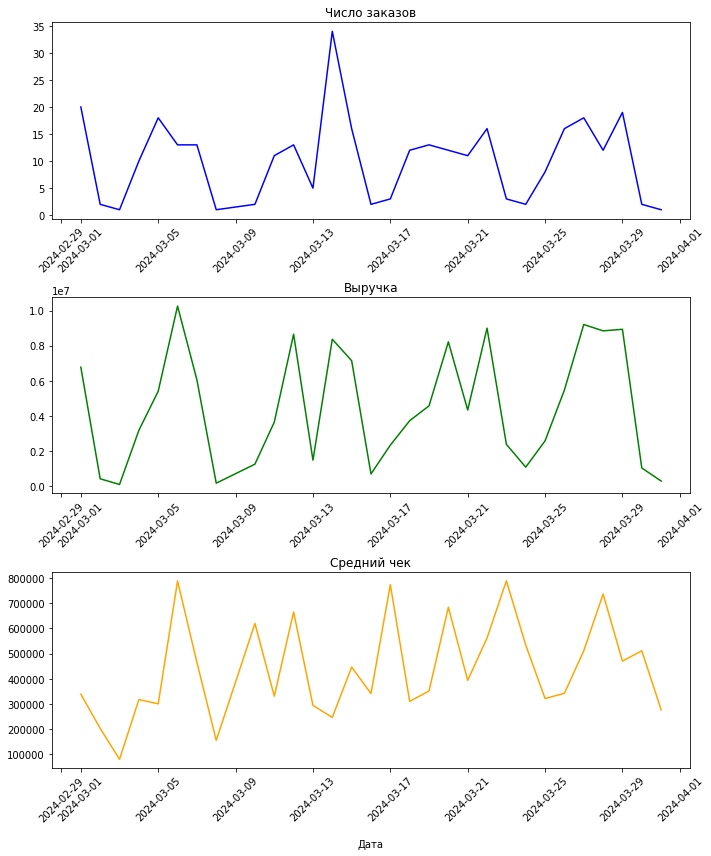

In [82]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Первый график
axs[0].plot(df_report_by_date['date'], df_report_by_date['orders'], color='blue')
axs[0].set_title('Число заказов')

# Второй график
axs[1].plot(df_report_by_date['date'], df_report_by_date['revenue'], color='green')
axs[1].set_title('Выручка')

# Третий график
axs[2].plot(df_report_by_date['date'], df_report_by_date['average_bill'], color='orange')
axs[2].set_title('Средний чек')

for ax in axs:
    ax.tick_params(labelbottom=True)
    ax.tick_params(axis='x', rotation=45)

# Общая подпись по оси X
plt.xlabel('\nДата')

# Автоматическая подстройка
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  

# Показать всё
plt.show()

In [83]:
total[['brand', 'name_3']] = total['name'].str.split(',', expand=True)


In [84]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue,brand,name_3
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,290228.966302,Heco,Ambient 33F
1,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled,"Edifier, MP380",83.91,Портативная акустика,90.7493,7614.773763,121836.380208,Edifier,MP380
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники,90.7493,22613.818067,949780.358814,Harman Kardon,Fly ANC
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном,90.8423,2320.112342,20881.011078,Sennheiser,PC 7 USB
4,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled,"JBL, Stage A120P",324.19,Сабвуфер,90.8423,29450.165237,412302.313318,JBL,Stage A120P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,OYBY-86181208,211,2,Анастасия Дудкина,2024-03-31,11,confirmed,"Denon, AVC-X4700H",1496.81,AV-ресивер,92.3660,138254.352460,276508.704920,Denon,AVC-X4700H
342,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed,"Heco, Concerto 3000",1720.72,Музыкальный центр,92.3660,158936.023520,794680.117600,Heco,Concerto 3000
343,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed,"Heco, Music Style 200",205.35,Полочная акустика,92.3660,18967.358100,227608.297200,Heco,Music Style 200
344,QAOD-42518444,90,8,Екатерина Тарелкина,2024-03-24,97,confirmed,"Bose, Virtually Invisible 591",298.17,Настенная акустика,92.6118,27614.060406,220912.483248,Bose,Virtually Invisible 591


In [86]:
total['brand'].nunique()

60

In [87]:
total

,order_id,product_id,quantity,manager,date,client_id,status,name,price,category,currency_rate,price_rub,revenue,brand,name_3
0,QPLK-54839036,489,11,Владимир Ударников,2024-03-10,52,confirmed,"Heco, Ambient 33F",290.74,Настенная акустика,90.7493,26384.451482,290228.966302,Heco,Ambient 33F
1,MAQJ-95867467,317,16,Екатерина Тарелкина,2024-03-10,84,canceled,"Edifier, MP380",83.91,Портативная акустика,90.7493,7614.773763,121836.380208,Edifier,MP380
2,KHLF-51759445,383,42,Сергей Контрабасов,2024-03-10,23,confirmed,"Harman Kardon, Fly ANC",249.19,Беспроводные наушники,90.7493,22613.818067,949780.358814,Harman Kardon,Fly ANC
3,DALF-47566548,1367,9,Владимир Ударников,2024-03-01,97,confirmed,"Sennheiser, PC 7 USB",25.54,Наушники с микрофоном,90.8423,2320.112342,20881.011078,Sennheiser,PC 7 USB
4,BZHU-92977894,630,14,Владимир Ударников,2024-03-01,29,canceled,"JBL, Stage A120P",324.19,Сабвуфер,90.8423,29450.165237,412302.313318,JBL,Stage A120P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,OYBY-86181208,211,2,Анастасия Дудкина,2024-03-31,11,confirmed,"Denon, AVC-X4700H",1496.81,AV-ресивер,92.3660,138254.352460,276508.704920,Denon,AVC-X4700H
342,RJPI-21712323,473,5,Екатерина Тарелкина,2024-03-30,22,confirmed,"Heco, Concerto 3000",1720.72,Музыкальный центр,92.3660,158936.023520,794680.117600,Heco,Concerto 3000
343,XRPC-48091227,495,12,Виктор Тромбонов,2024-03-30,52,confirmed,"Heco, Music Style 200",205.35,Полочная акустика,92.3660,18967.358100,227608.297200,Heco,Music Style 200
344,QAOD-42518444,90,8,Екатерина Тарелкина,2024-03-24,97,confirmed,"Bose, Virtually Invisible 591",298.17,Настенная акустика,92.6118,27614.060406,220912.483248,Bose,Virtually Invisible 591


In [103]:
total_brands=total.groupby('brand', as_index = False).\
                   agg({'order_id': 'nunique', 'revenue':'sum'}).\
                   sort_values('revenue', ascending =False)
top_5_brands = total_brands.head(5)
top_5_brands

,brand,order_id,revenue
18,JBL,52,1.663724e+07
17,Heco,39,1.527613e+07
59,Yamaha,30,1.322477e+07
23,Klipsch,21,1.172189e+07
57,Wharfedale,13,9.991293e+06


In [100]:
total_manager = df_confirmed.groupby('manager', as_index = False).\
                             agg({'revenue':'sum','order_id':'nunique'}).\
                             sort_values('revenue')
total_manager['manager_rate']=(total_manager['revenue']*100/total_manager.revenue.sum()).round(2)
total_manager['manager_rate_orders']=(total_manager['order_id']*100/total_manager.order_id.sum()).round(2)
top_5_managers = total_manager.sort_values('manager_rate', ascending = False).head(5)
top_5_managers

,manager,revenue,order_id,manager_rate,manager_rate_orders
4,Виктор Тромбонов,2.475523e+07,50,18.29,16.18
8,Максим Барабанов,1.707492e+07,40,12.61,12.94
9,Маргарита Камертонова,1.621394e+07,48,11.98,15.53
7,Ксения Балалайкина,1.614476e+07,27,11.93,8.74
0,Алексей Саксофонов,1.494281e+07,27,11.04,8.74
